In [20]:
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

In [21]:
# Constructing cities list - cities.csv

with open('city.list.json', 'r',encoding='utf-8') as jsonfile:
    jsndata = json.load(jsonfile)

ids = []
nam = []
country = []
lat = []
lon = []

for i in range(len(jsndata)):
    ids.append(jsndata[i]['id'])
    nam.append(jsndata[i]['name'].lower())
    country.append(jsndata[i]['country'])
    lat.append(jsndata[i]['coord']['lat'])
    lon.append(jsndata[i]['coord']['lon'])
    
dftemp = pd.DataFrame({'id':ids,'City':nam,'Country':country,'Lat':lat,'Lng':lon})
dftemp.to_csv("output_data/allcities.csv", index=False, header=True)

In [22]:
# read csv into dF
dfcities = pd.read_csv("output_data/allcities.csv", encoding="utf-8")
dfcities = dfcities.set_index('City')
dfcities.head()

,id,Country,Lat,Lng
City,,,,
hurzuf,707860,UA,44.549999,34.283333
novinki,519188,RU,55.683334,37.666668
gorkhā,1283378,NP,28.000000,84.633331
state of haryāna,1270260,IN,29.000000,76.000000
holubynka,708546,UA,44.599998,33.900002


In [24]:
# Generate 500 cities and save to csv

ncities = 500
namsel = []
idsel = []
countrysel = []
latsel = []
lonsel = []
i = 0
while(i < ncities):
    i = i+1
    latitude = random.uniform(-90.0,90.0)
    longitude = random.uniform(-180.0,180.0)
    city = citipy.nearest_city(latitude,longitude)
    try:
        id = int(dfcities.loc[city.city_name]['id'])
        try:
            itemp = idsel.index(id)
            i = i - 1
        except:
            idsel.append(id)
            namsel.append(city.city_name)
            countrysel.append(dfcities.loc[city.city_name]['Country'])
            latsel.append(dfcities.loc[city.city_name]['Lat'])
            lonsel.append(dfcities.loc[city.city_name]['Lng'])
    except:
        i = i - 1

dftemp = pd.DataFrame({'City':namsel,'id':idsel,'Country':countrysel,'Lat':latsel,'Lng':lonsel})
dftemp.to_csv("output_data/dfselected.csv", index=False, header=True)

500
             City       id Country        Lat         Lng
0            lebu  3883457      CL -37.616669  -73.650002
1       havoysund   779622      NO  70.996338   24.662170
2  cabo san lucas  3985710      MX  22.890881 -109.912376
3      codrington  2171099      AU -38.266670  141.966675
4         ushuaia  3833367      AR -54.799999  -68.300003


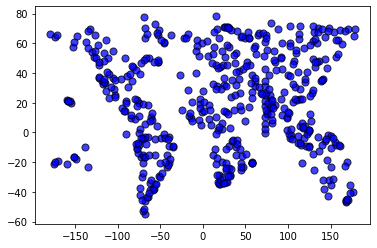

In [25]:
#Read csv file

dfselected = pd.read_csv("output_data/dfselected.csv", encoding="utf-8")

# Print cities
print(len(dfselected)) 


print(dfselected.head())

# Scatterplot
plt.scatter(dfselected["Lng"],dfselected["Lat"],marker="o",facecolors="b",edgecolors="black",s=50,alpha=0.75)

In [26]:
# Requests from openweather api

jsnlist = []

i = 0
waitingtime = 0
ncities = len(dfselected)
while i < ncities:
    id = dfselected['id'][i]
    url = f"http://api.openweathermap.org/data/2.5/forecast?id={id}&units=imperial&APPID={weather_api_key}"
    jsn = requests.get(url).json()
    try:
        print('City-{0}: {1}'.format(i,jsn['city']['name']))
        jsnlist.append(jsn)
        i = i + 1
        waitingtime = 0
    except:
        waitingtime = waitingtime + 1
        print(f"Waiting {waitingtime} seconds")
        time.sleep(1)
    
with open('output_data/weatherlist.json', 'w') as jsonfile:
    json.dump(jsnlist, jsonfile)

City-0: Lebu
City-1: Havøysund
City-2: Cabo San Lucas
City-3: Codrington
City-4: Ushuaia
City-5: Shache
City-6: Chara
City-7: Norman Wells
City-8: Mahébourg
City-9: Khonsa
City-10: Mucurapo
City-11: Bumba
City-12: Örnsköldsvik
City-13: Khatanga
City-14: Matamoros
City-15: Srednekolymsk
City-16: New Norfolk
City-17: Tautira
City-18: Zabol
City-19: Rikitea
City-20: Tobol
City-21: Mporokoso
City-22: Atuona
City-23: Devarkonda
City-24: Ulladulla
City-25: Verkhnyaya Sinyachikha
City-26: Bengkulu
City-27: Dubbo
City-28: Edson
City-29: La Ronge
City-30: Cape Town
City-31: Chokurdakh
City-32: Arraial do Cabo
City-33: Cherskiy
City-34: Rawson
City-35: Nānākuli
City-36: Bow Island
City-37: Pacific Grove
City-38: Hilo
City-39: Ust-Kuyga
City-40: Bredasdorp
City-41: Yellowknife
City-42: Saint Paul Harbor
City-43: Punta Arenas
City-44: Ugoofaaru
City-45: Shirokiy
City-46: Katsuura
City-47: Ust'-Tarka
City-48: Batagay-Alyta
City-49: Taoudenni
City-50: Dikson
City-51: Vaini
City-52: Mar del Plata
Cit

City-427: Eyl
City-428: Chernyshevskiy
City-429: Borogontsy
City-430: Nanning
City-431: Maragogi
City-432: Betsiamites
City-433: Celestún
City-434: Omsukchan
City-435: Tonantins
City-436: College
City-437: Turaif
City-438: Kalianget
City-439: Tenabo
City-440: Shonguy
City-441: Mīnāb
City-442: Wanaka
City-443: Mokhotlong
City-444: Nizwá
City-445: Awjilah
City-446: Vitória do Mearim
City-447: Caucayá
City-448: Ocós
City-449: Båtsfjord
City-450: Mersing
City-451: Toccoa
City-452: Kefamenanu
City-453: Makakilo City
City-454: Yarega
City-455: Port Keats
City-456: Esmeraldas
City-457: Wahiawā
City-458: Pangkalanbuun
City-459: Muravlenko
City-460: Egvekinot
City-461: Fujin
City-462: Chicama
City-463: Merauke
City-464: Mookane
City-465: Guangyuan
City-466: Herrin
City-467: Coripata
City-468: Bonthe
City-469: Nueva Guinea
City-470: Killybegs
City-471: Saint-Georges
City-472: Upata
City-473: Vanavara
City-474: Mitsamiouli
City-475: Nakhon Pathom
City-476: Grand-Santi
City-477: Vaitape
City-478: 

In [27]:
# Read json and csv

with open('output_data/weatherlist.json', 'r',encoding='utf-8') as jsonfile:
    weatherlist = json.load(jsonfile)


cities = pd.read_csv("output_data/dfselected.csv", encoding="utf-8")
del cities['id']

cities['Date'] = [weatherlist[i]['list'][0]['dt'] for i in range(len(weatherlist))]
cities['Cloudiness'] = [weatherlist[i]['list'][0]['clouds']['all'] for i in range(len(weatherlist))]
cities['Humidity'] = [weatherlist[i]['list'][0]['main']['humidity'] for i in range(len(weatherlist))]
cities['Max Temp'] = [weatherlist[i]['list'][0]['main']['temp_max'] for i in range(len(weatherlist))]
cities['Wind Speed'] = [weatherlist[i]['list'][0]['wind']['speed'] for i in range(len(weatherlist))]

# Save
cities.to_csv("output_data/cities.csv", index=False, header=True)

In [28]:
cities = pd.read_csv("output_data/cities.csv", encoding="utf-8")
cities.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,lebu,CL,-37.616669,-73.650002,1603249200,5,78,49.26,16.80
1,havoysund,NO,70.996338,24.662170,1603249200,20,83,36.05,6.31
2,cabo san lucas,MX,22.890881,-109.912376,1603249200,3,75,80.87,8.72
3,codrington,AU,-38.266670,141.966675,1603249200,21,70,58.50,8.23
4,ushuaia,AR,-54.799999,-68.300003,1603249200,69,81,37.85,5.12


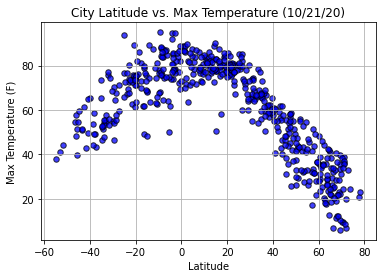

In [29]:
ts = time.gmtime(cities['Date'][0])
# print(time.strftime("%m/%d/%Y %H:%M:%S", ts))
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Max Temp'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/fig1.png")
plt.show()

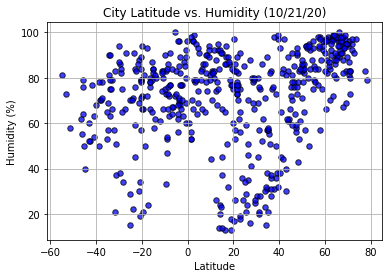

In [30]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Humidity'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2.png")
plt.show()

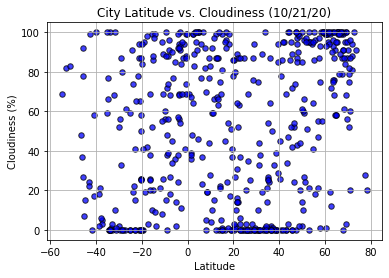

In [31]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3.png")
plt.show()

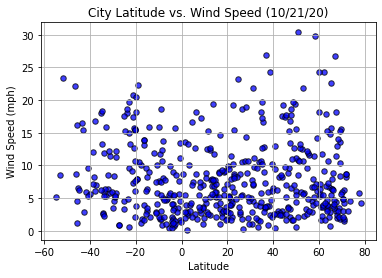

In [33]:
ts = time.gmtime(cities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(cities['Lat'],cities['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({datestr})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig4.png")
plt.show()

In [34]:
northern = cities.loc[cities["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = cities.loc[cities["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [45]:
# Plotting functions

def plotLinearRegression(x_value,y_value,xlabel,ylabel,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()


The r-squared is: -0.919181074912437


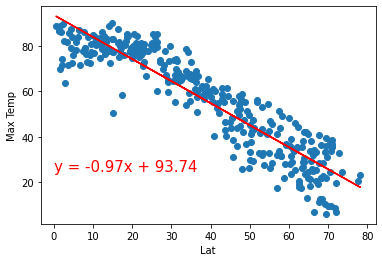

In [46]:
# NORTHERN HEMIS - MAX TEMP VS LATITUDE REGRESS 
xlabel = "Lat"
ylabel = "Max Temp"
lblpos = (0,25)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,lblpos,5)

The r-squared is: 0.7377814347970658


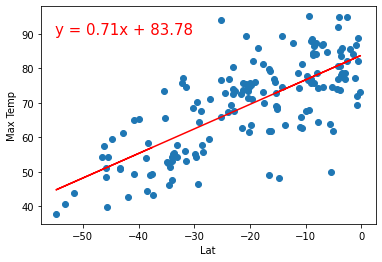

In [47]:
# SOUTHERN MAX TEMP VS LATITUDE REGRESS

xlabel = "Lat"
ylabel = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,6)

The r-squared is: 0.3500771483250899


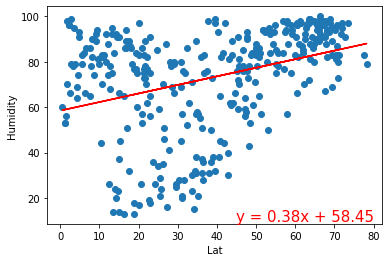

In [48]:
# NORTHERN HEMIS - HUMIDITY(%) vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,lblpos,7)

The r-squared is: 0.2307496674788825


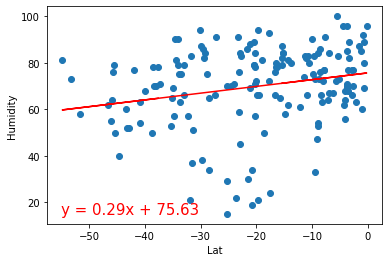

In [55]:
# SOUTHERN HEMIS - HUMIDITY(%) vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,8)

The r-squared is: 0.27722881562430407


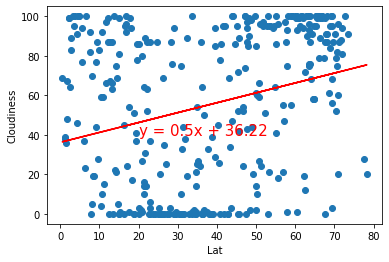

In [56]:
# NORTHERN HEMIS - CLOUDINESS (%) vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,lblpos,9)

The r-squared is: 0.29058265238178654


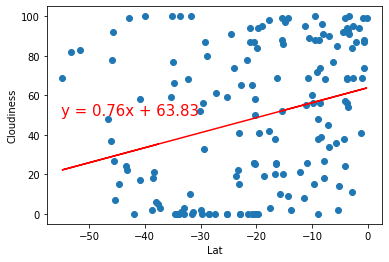

In [57]:
# SOUTHERN HEMIS - CLOUDINESS(%) vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,10)

The r-squared is: 0.08637330043384113


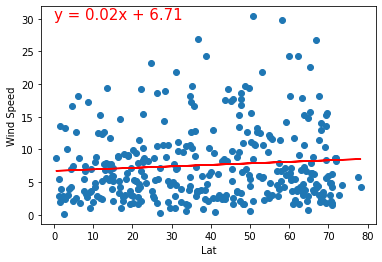

In [58]:
# NORTHERN HEMIS - Wind Speed (mph) vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,lblpos,11)

The r-squared is: -0.2716209889972498


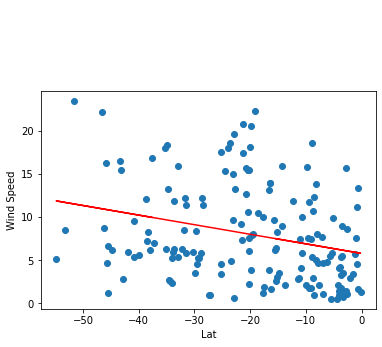

In [59]:
# SOUTHERN HEMIS - Wind speed vs LATITUDE REGRESS
xlabel = "Lat"
ylabel = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,lblpos,12)

# OBSERVATION

#1 - There is a strong correlation in the northern hemisphere as the latitude goes away from the equator, temperature decreases.
#2 - It seems that the southern hemisphere does not have very strong correlations when it comes to cloudiness and humidity.
#3 - City latitude vs max temperature is easy to see that temperature increases as it goes towards the equator.